 Program Requirements:
    1. Automate data manipulation process.
    2. Easily reproduce analysis on different datasets using similar format--saves time!
    3. Import necessary libraries.
    4. Research how to install any missing packages, if necessary.
    5. Give short, cogent answers to the following questions (in *your* words):
        a. What is AI?
        b. What is machine learning?
        c. What is deep learning and neural networks?
        d. What is natural language processing (NLP)?
    6. Research differences between TensorFlow and PyTorch:
        a. What are they used for?
        b. List differences.
        c. Why would you use one over the other?
    7. Download .csv dataset.
    8. Create at least three functions that are called by the program:
        a. main(): calls at least two other functions.
        b. get_requirements(): displays the program requirements
        c. data_analysis_2(): displays the following data.
    9. When running program:
        a. Document any issues.
        b. Document solutions attempted.
        c. How good was data model--compared to actual data (accuracy percentage)?
     ***DataFrame composed of three components: index, columns, and data. Data also known as values.***


Program Requirements:
1. Automate data manipulation process.
2. Easily reproduce analysis on different datasets using similar format--saves time!
3. Import necessary libraries.
4. Research how to install any missing packages, if necessary.
5. Give short, cogent answers to the following questions (in *your* words):
     a. What is AI?
     b. What is machine learning?
     c. What is deep learning and neural networks?
     d. What is natural language processing (NLP)?
6. Research differences between TensorFlow and PyTorch:
     a. What are they used for?
     b. List differences.
     c. Why would you use one over the other?
7. Download .csv dataset.
8. Create at least three functions that are called by the program:
     a. main(): calls at least two other functions.
     b. get_requirements(): displays the program requirements
     c. data_analysis_2(): displays the following data.
9. When running program:
     a. Document any issues.
     b. Document solutions attempted.
     c. How 

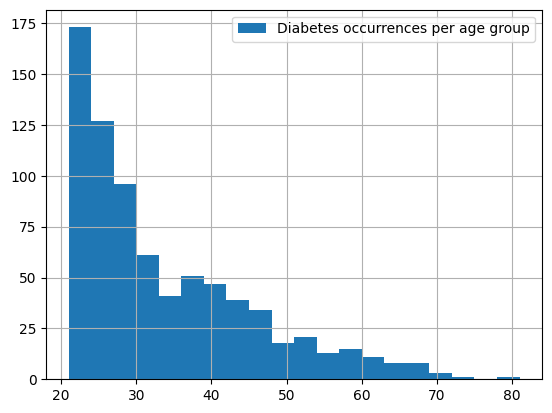


16. Combining features:
{'accuracy': 0.71653545, 'accuracy_baseline': 0.6574803, 'auc': 0.7792691, 'auc_precision_recall': 0.6347599, 'average_loss': 0.5700302, 'label/mean': 0.34251967, 'loss': 0.57377285, 'precision': 0.8, 'prediction/mean': 0.35460106, 'recall': 0.22988506, 'global_step': 1000}


In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def get_requirements():
    print("\nProgram Requirements:\n"
            + "1. Automate data manipulation process.\n"
            + "2. Easily reproduce analysis on different datasets using similar format--saves time!\n"
            + "3. Import necessary libraries.\n"
            + "4. Research how to install any missing packages, if necessary.\n"
            + "5. Give short, cogent answers to the following questions (in *your* words):\n"
            + "     a. What is AI?\n"
            + "     b. What is machine learning?\n"
            + "     c. What is deep learning and neural networks?\n"
            + "     d. What is natural language processing (NLP)?\n"
            + "6. Research differences between TensorFlow and PyTorch:\n"
            + "     a. What are they used for?\n"
            + "     b. List differences.\n"
            + "     c. Why would you use one over the other?\n"
            + "7. Download .csv dataset.\n"
            + "8. Create at least three functions that are called by the program:\n"
            + "     a. main(): calls at least two other functions.\n"
            + "     b. get_requirements(): displays the program requirements\n"
            + "     c. data_analysis_2(): displays the following data.\n"
            + "9. When running program:\n"
            + "     a. Document any issues.\n"
            + "     b. Document solutions attempted.\n"
            + "     c. How good was data model--compared to actual data (accuracy percentage)?\n")
    print("***DataFrame composed of three components: index, columns, and data. Data also known as values.***")

def get_analysis_2():
    df = pd.read_csv('pima-indians-diabetes.csv', skiprows=0)

    print("1. Print indexes:")
    df.index = pd.RangeIndex(start=0, stop=768, step=1)
    print (df.index)

    print("\n2. Print columns:")
    print(df.columns)

    print("\n3. Print data frame:")
    print(df)

    print("\n4. Print type:")
    print(type(df))

    print("\n5. Print attribute data types--object type represents strings (e.g., M and F in sex):")
    print(df.dtypes)

    print("\n6. Print values (truncated list), in array format.")
    print(df.values)

    print("\n7. Print index of all DataFrame column names:")
    print(list(df))

    print("\n8. Print DataFrame info (i.e., summary, similar to 'describe tablename;' in MySQL")
    print(df.info(verbose=True))

    print("\n9. Print *only* number of DataFrame rows:")
    print(len(df))

    print("\n10. Print *only* number of DataFrame columns:")
    print(len(df.columns))

    print("\n11. Print number of DataFrame rows and columns:")
    print(df.shape)

    print("\n12. Print number of DataFrame elements (i.e., rows * columns")
    print(df.size)

    print("\n13. Cleaning Data:")
    all_cols = ['num_preg', 'gluc_concentrate', 'blood_press',
                'triceps', 'insulin', 'bmi', 'pedigree', 'age', 'class']

    cols_to_norm = ['num_preg', 'gluc_concentrate', 'blood_press',
                'triceps', 'insulin', 'bmi', 'pedigree']
    df[cols_to_norm] = df[cols_to_norm].apply(
        lambda x: (x - x.min()) / (x.max() - x.min()))

    print("\n14. Begin TensorFlow Analysis - create variables:")
    num_preg = tf.feature_column.numeric_column('num_preg')
    gluc_concentrate = tf.feature_column.numeric_column('gluc_concentrate')
    blood_press = tf.feature_column.numeric_column('blood_press')
    triceps = tf.feature_column.numeric_column('triceps')
    insulin = tf.feature_column.numeric_column('insulin')
    bmi = tf.feature_column.numeric_column('bmi')
    pedigree = tf.feature_column.numeric_column('pedigree')
    age = tf.feature_column.numeric_column('age')

    print("\n15. Create (generic) categorical features (used for analysis):")
    assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
        'Group', ['A', 'B', 'C', 'D'])
    df['age'].hist(bins=20)
    plt.legend(['Diabetes occurrences per age group'])
    plt.show()

    print("\n16. Combining features:")
    age_groups = tf.feature_column.bucketized_column(
        age, boundaries=[20, 30, 40, 50, 60, 70, 80])

    feat_cols = [num_preg, gluc_concentrate, blood_press, triceps,
                insulin, bmi, pedigree, age]

    x_data = df.drop('class', axis=1)
    labels = df['class']
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, labels, test_size=0.33, random_state=101)

    input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True
    )

    model = tf.estimator.LinearClassifier(
        feature_columns=feat_cols, n_classes=2)
    model.train(input_fn=input_func, steps=1000)
    pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test, batch_size=10, num_epochs=1, shuffle=False)

    predictions = model.predict(pred_input_func)
    list(predictions)
                    
    eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
    results = model.evaluate(eval_input_func)
    print(results)

def main():
    get_requirements()
    get_analysis_2()
if __name__ == "__main__":
    main()